[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/classification/Multiple-Linear-Classification.ipynb)

In [ ]:
#importing all the required libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

### Reading Dataset

In [ ]:
!wget https://github.com/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/dataset/flower_dataset.csv

In [ ]:
#reading the dataset
df = pd.read_csv('flower_dataset.csv')
df
df.shape

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


(18185, 12)

### Dropping Irrelevant Features

In [ ]:
#dropping irrelevant feature like "id"
df.drop(['id'], axis = 1,inplace=True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


### Normalizing the dataset

In [ ]:
#normalizing the dataset
col_names = np.array(df.columns)
col_names = col_names[:-1]
for i in col_names:
    col = np.array(df[i])
    mean_col = np.mean(col)
    std_col = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-mean_col)/std_col)
    df[i] = norm_col
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800,jasmine
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418,jasmine
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950,jasmine
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690,jasmine
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645,jasmine
...,...,...,...,...,...,...,...,...,...,...,...
18180,-0.806657,-0.246943,-0.872502,0.778548,-0.810816,-0.788051,-1.130973,-0.632104,-0.661944,0.720875,Gonen
18181,0.373857,1.447410,-0.165603,0.784700,0.386282,0.417903,0.295131,1.149128,-0.990018,0.730936,Gonen
18182,-0.457683,0.250187,-0.685768,0.796550,-0.462606,-0.414880,-0.530388,-0.317085,-0.373899,0.750451,Gonen
18183,-0.733727,-0.022853,-0.828242,0.818359,-0.690307,-0.708755,-1.190322,-0.279187,-1.081165,0.786835,Gonen


### Label Encoding


In [ ]:
#LabelEncoding the target variable
df['Class'] = pd.factorize(df['Class'])[0]
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800,0
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418,0
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950,0
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690,0
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645,0
...,...,...,...,...,...,...,...,...,...,...,...
18180,-0.806657,-0.246943,-0.872502,0.778548,-0.810816,-0.788051,-1.130973,-0.632104,-0.661944,0.720875,1
18181,0.373857,1.447410,-0.165603,0.784700,0.386282,0.417903,0.295131,1.149128,-0.990018,0.730936,1
18182,-0.457683,0.250187,-0.685768,0.796550,-0.462606,-0.414880,-0.530388,-0.317085,-0.373899,0.750451,1
18183,-0.733727,-0.022853,-0.828242,0.818359,-0.690307,-0.708755,-1.190322,-0.279187,-1.081165,0.786835,1


### Shuffling Dataset

In [ ]:
df = df.sample(frac=1)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
831,-1.149497,-1.441068,-0.785840,0.207710,-1.132395,-1.170922,-0.780165,-1.419058,-0.107882,-0.046503,0
13745,1.206079,0.483161,1.204874,-0.835610,1.198551,1.186604,1.709028,0.869329,1.033253,-0.936559,1
12121,0.968204,0.111226,1.182164,-1.044162,1.006802,0.972644,0.124183,0.739329,0.804468,-1.068136,1
7972,-0.285241,0.931487,-0.727186,1.029043,-0.300818,-0.236027,-1.346320,0.355055,-1.094276,1.173282,0
3940,-0.752130,-0.293784,-0.804508,0.706517,-0.778192,-0.728697,-0.488173,-0.695528,-0.413976,0.606485,0
...,...,...,...,...,...,...,...,...,...,...,...
15144,1.010463,0.422374,1.023768,-0.679601,1.056737,1.010973,1.305164,0.784651,0.806239,-0.830224,1
16889,1.213576,0.858326,1.026334,-0.444462,1.276449,1.193278,-0.047883,1.330858,0.255935,-0.655199,1
6326,-0.412017,0.553130,-0.702815,0.903956,-0.411340,-0.367175,-1.401244,0.232274,-1.173113,0.935833,0
2666,-0.455638,-0.066682,-0.554006,0.580081,-0.465269,-0.412738,0.849806,-0.365323,-0.284189,0.419702,0


### Reducing Dimension to 2 for visualiaztion

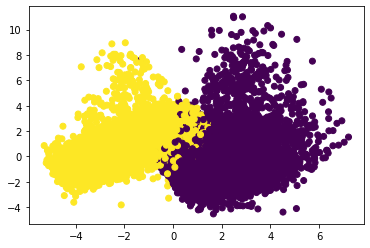

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df.iloc[:,:-1])
#X[:,0]
plt.scatter(X[:,0],X[:,1],c= np.array(df.iloc[:,-1]))

### Dividing dataset into X and Y

In [ ]:
df_X = df.iloc[:,:-1]
df_Y = df.iloc[:,-1]
X = np.array(df_X)
Y = np.array(df_Y)
Y = Y.reshape((Y.shape[0],))
print("X : {}".format(X))
print("Y : {}".format(Y))


X : [[-1.14949744 -1.44106799 -0.78583965 ... -1.41905833 -0.10788211
  -0.04650319]
 [ 1.206079    0.48316087  1.20487355 ...  0.86932939  1.03325278
  -0.9365593 ]
 [ 0.96820395  0.11122567  1.18216387 ...  0.73932855  0.80446817
  -1.06813615]
 ...
 [-0.41201662  0.55312992 -0.7028153  ...  0.23227441 -1.17311347
   0.93583282]
 [-0.45563841 -0.06668173 -0.5540061  ... -0.36532268 -0.28418949
   0.41970187]
 [ 1.46917289  1.11409579  1.17416402 ...  1.26248448  0.8310321
  -0.66408145]]
Y : [0 1 1 ... 0 0 1]


# Data Learning Using SKLearn Library

In [ ]:
from sklearn.linear_model import Perceptron
PER_classifier = Perceptron()

In [ ]:
from sklearn.model_selection import cross_validate
PER_result = (cross_validate(PER_classifier,X,Y,cv=7,return_train_score=True))
PER_training_accuracy = PER_result['train_score']
PER_testing_accuracy = PER_result['test_score']
print("training accuracy over 7 folds : {}".format(list(PER_training_accuracy)))
print("average training accuracy : {}".format(np.mean(PER_training_accuracy)))
print("")
print("testing accuracy over 7 folds :{}".format(list(PER_testing_accuracy)))
print("average testing accuracy : {}".format(np.mean(PER_testing_accuracy)))

training accuracy over 7 folds : [0.9872971065631616, 0.9808173477898249, 0.9885160710848784, 0.9865913902611151, 0.9877461987553731, 0.980175787515237, 0.9841544778034386]
average training accuracy : 0.9850426256818613

testing accuracy over 7 folds :[0.9892224788298691, 0.9765204003079292, 0.9880677444187836, 0.9857582755966128, 0.9861431870669746, 0.9807544264819091, 0.9845976126299576]
average testing accuracy : 0.984437732190291
